<a href="https://colab.research.google.com/github/OtolaHan/Otola_Han_KAAN/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Hometask3a_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

## Часть 1. Обучение моделей классификации (5 баллов).

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC?
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Загрузка данных
df = pd.read_csv('/content/telecom_churn.csv')

# Предварительный анализ данных
print(df.head())
print(df.describe())
print(df.info())

# Подготовка данных для обучения
X = pd.get_dummies(df.drop(['Churn'], axis=1))
y = df['Churn'].astype(int)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Подбор гиперпараметров логистической регрессии
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Обучение модели с оптимальными гиперпараметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Оценка качества модели
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

print('Accuracy (train):', accuracy_score(y_train, y_pred_train))
print('Accuracy (test):', accuracy_score(y_test, y_pred_test))
print('F1-score (train):', f1_score(y_train, y_pred_train))
print('F1-score (test):', f1_score(y_test, y_pred_test))
print('ROC-AUC (train):', roc_auc_score(y_train, y_pred_train))
print('ROC-AUC (test):', roc_auc_score(y_test, y_pred_test))


  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [3]:
from sklearn.svm import SVC

# Подбор гиперпараметров SVM с линейным ядром
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Обучение модели с оптимальными гиперпараметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Оценка качества модели
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

print('Accuracy (train):', accuracy_score(y_train, y_pred_train))
print('Accuracy (test):', accuracy_score(y_test, y_pred_test))
print('F1-score (train):', f1_score(y_train, y_pred_train))
print('F1-score (test):', f1_score(y_test, y_pred_test))
print('ROC-AUC (train):', roc_auc_score(y_train, y_pred_train))
print('ROC-AUC (test):', roc_auc_score(y_test, y_pred_test))

Accuracy (train): 0.9838709677419355
Accuracy (test): 0.8830584707646177
F1-score (train): 0.9405255878284925
F1-score (test): 0.5185185185185185
ROC-AUC (train): 0.9448072638248319
ROC-AUC (test): 0.6911363397823881


In [4]:
from sklearn.preprocessing import PolynomialFeatures


# Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Подбор гиперпараметров логистической регрессии
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Обучение модели с оптимальными гиперпараметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Оценка качества модели
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

print('Accuracy (train):', accuracy_score(y_train, y_pred_train))
print('Accuracy (test):', accuracy_score(y_test, y_pred_test))
print('F1-score (train):', f1_score(y_train, y_pred_train))
print('F1-score (test):', f1_score(y_test, y_pred_test))
print('ROC-AUC (train):', roc_auc_score(y_train, y_pred_train))
print('ROC-AUC (test):', roc_auc_score(y_test, y_pred_test))

Accuracy (train): 0.872093023255814
Accuracy (test): 0.856071964017991
F1-score (train): 0.3696857670979667
F1-score (test): 0.29411764705882354
ROC-AUC (train): 0.6179741154033064
ROC-AUC (test): 0.5857590175978729


Accuracy (train): 0.872093023255814
Accuracy (test): 0.856071964017991
F1-score (train): 0.3696857670979667
F1-score (test): 0.29411764705882354
ROC-AUC (train): 0.6179741154033064
ROC-AUC (test): 0.5857590175978729


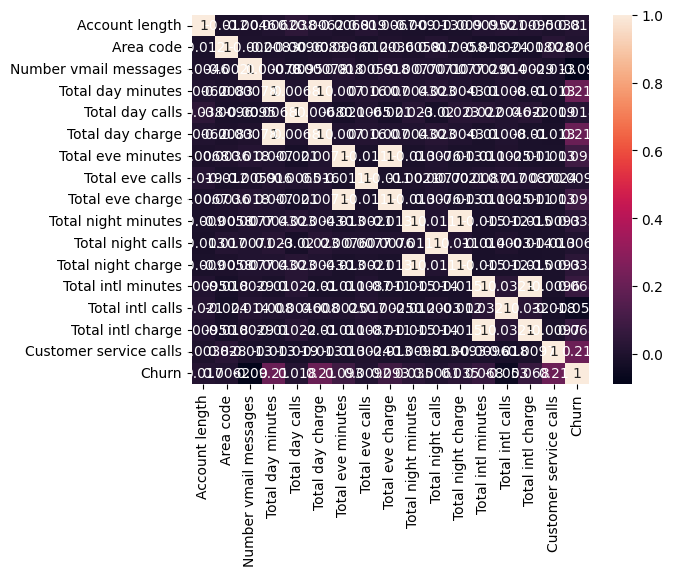

In [6]:
# Построение матрицы корреляций
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)

# Подбор гиперпараметров логистической регрессии
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Обучение модели с оптимальными гиперпараметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Оценка качества модели
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

print('Accuracy (train):', accuracy_score(y_train, y_pred_train))
print('Accuracy (test):', accuracy_score(y_test, y_pred_test))
print('F1-score (train):', f1_score(y_train, y_pred_train))
print('F1-score (test):', f1_score(y_test, y_pred_test))
print('ROC-AUC (train):', roc_auc_score(y_train, y_pred_train))
print('ROC-AUC (test):', roc_auc_score(y_test, y_pred_test))

Ваш отчет здесь.

## Часть 2. Оценка качества моделей классификации (5 баллов).

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные).
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [7]:
df = pd.read_csv("/content/credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [8]:
df.shape

(689, 21)

**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [9]:
import pandas as pd

df = pd.read_csv("/content/credit_scoring_example1.csv")

class_counts = df['target'].value_counts(normalize=True)
print(class_counts)

if class_counts[0] == class_counts[1]:
    print("Классы полностью сбалансированы.")
elif abs(class_counts[0] - class_counts[1]) < 0.1:
    print("Классы относительно сбалансированы.")
else:
    print("Существует значительный дисбаланс между классами.")

0    0.554427
1    0.445573
Name: target, dtype: float64
Существует значительный дисбаланс между классами.


**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [10]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(df['target'], df['pred1_classes'])
accuracy2 = accuracy_score(df['target'], df['pred2_classes'])
accuracy3 = accuracy_score(df['target'], df['pred3_classes'])

print(f"Accuracy алгоритма 1: {accuracy1}")
print(f"Accuracy алгоритма 2: {accuracy2}")
print(f"Accuracy алгоритма 3: {accuracy3}")

best_accuracy = max(accuracy1, accuracy2, accuracy3)
print(f"Алгоритм с наибольшей accuracy: {best_accuracy}")

Accuracy алгоритма 1: 0.6618287373004355
Accuracy алгоритма 2: 0.6719883889695211
Accuracy алгоритма 3: 0.6400580551523948
Алгоритм с наибольшей accuracy: 0.6719883889695211


**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [11]:
from sklearn.metrics import precision_score, recall_score

precision1 = precision_score(df['target'], df['pred1_classes'])
recall1 = recall_score(df['target'], df['pred1_classes'])

precision2 = precision_score(df['target'], df['pred2_classes'])
recall2 = recall_score(df['target'], df['pred2_classes'])

precision3 = precision_score(df['target'], df['pred3_classes'])
recall3 = recall_score(df['target'], df['pred3_classes'])

print(f"Точность (Precision) алгоритма 1: {precision1}, Полнота (Recall) алгоритма 1: {recall1}")
print(f"Точность (Precision) алгоритма 2: {precision2}, Полнота (Recall) алгоритма 2: {recall2}")
print(f"Точность (Precision) алгоритма 3: {precision3}, Полнота (Recall) алгоритма 3: {recall3}")

Точность (Precision) алгоритма 1: 0.6907216494845361, Полнота (Recall) алгоритма 1: 0.4364820846905538
Точность (Precision) алгоритма 2: 0.6103542234332425, Полнота (Recall) алгоритма 2: 0.7296416938110749
Точность (Precision) алгоритма 3: 0.6903225806451613, Полнота (Recall) алгоритма 3: 0.3485342019543974


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [12]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

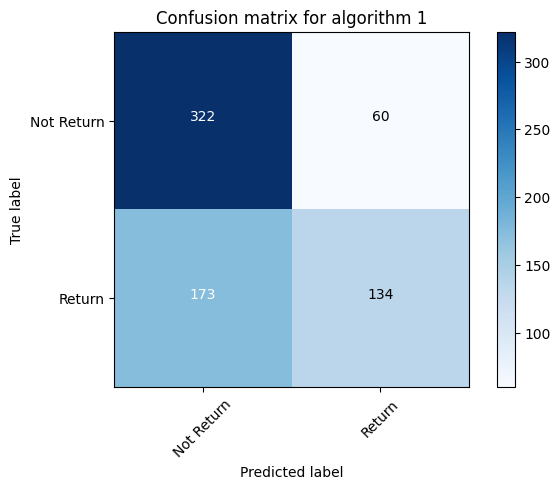

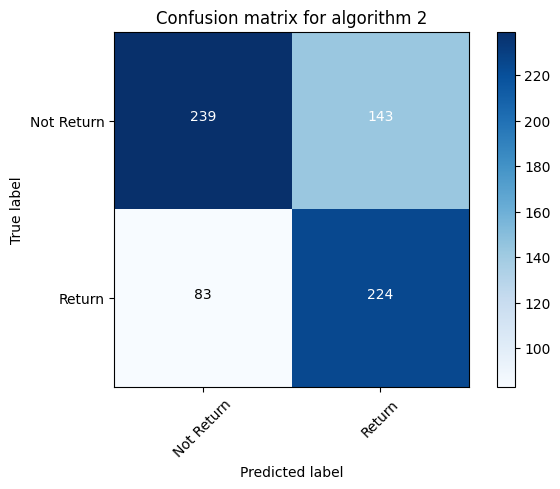

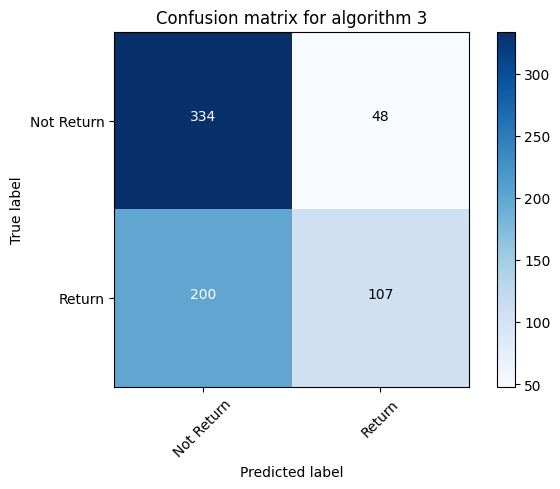

In [13]:
cm1 = confusion_matrix(df['target'], df['pred1_classes'])
cm2 = confusion_matrix(df['target'], df['pred2_classes'])
cm3 = confusion_matrix(df['target'], df['pred3_classes'])


plot_confusion_matrix(cm1, classes=['Not Return', 'Return'], title='Confusion matrix for algorithm 1')
plt.show()
plot_confusion_matrix(cm2, classes=['Not Return', 'Return'], title='Confusion matrix for algorithm 2')
plt.show()
plot_confusion_matrix(cm3, classes=['Not Return', 'Return'], title='Confusion matrix for algorithm 3')
plt.show()

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [26]:
from sklearn.metrics import confusion_matrix

def find_threshold_for_recall(probs, target, desired_recall=0.8):
    thresholds = np.arange(0, 1.01, 0.01)  # Создание массива порогов от 0 до 1 с шагом 0.01
    recalls = []  # Список для сохранения значений полноты

    for threshold in thresholds:
        preds = (probs >= threshold).astype(int)  # Применение порога к вероятностям для получения предсказаний
        recall = recall_score(target, preds)  # Вычисление полноты для текущего порога
        recalls.append(recall)  # Добавление значения полноты в список

        if recall >= desired_recall:
            return threshold, recall  # Возврат первого порога, при котором полнота достигает или превышает желаемый уровень

    best_threshold = thresholds[np.argmax(recalls)]  # Нахождение порога с наивысшей полнотой
    best_recall = np.max(recalls)  # Нахождение наивысшего значения полноты

    return best_threshold, best_recall  # Возврат наилучшего порога и соответствующей полноты

threshold1, recall1 = find_threshold(df['pred1_probs'], df['target'])
threshold2, recall2 = find_threshold(df['pred2_probs'], df['target'])
threshold3, recall3 = find_threshold(df['pred3_probs'], df['target'])

print(f"Best threshold and recall for algorithm 1: {threshold1}, {recall1}")
print(f"Best threshold and recall for algorithm 2: {threshold2}, {recall2}")
print(f"Best threshold and recall for algorithm 3: {threshold3}, {recall3}")

Best threshold and recall for algorithm 1: 0.36, 0.742671009771987
Best threshold and recall for algorithm 2: 0.27, 0.8371335504885994
Best threshold and recall for algorithm 3: None, 0


**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

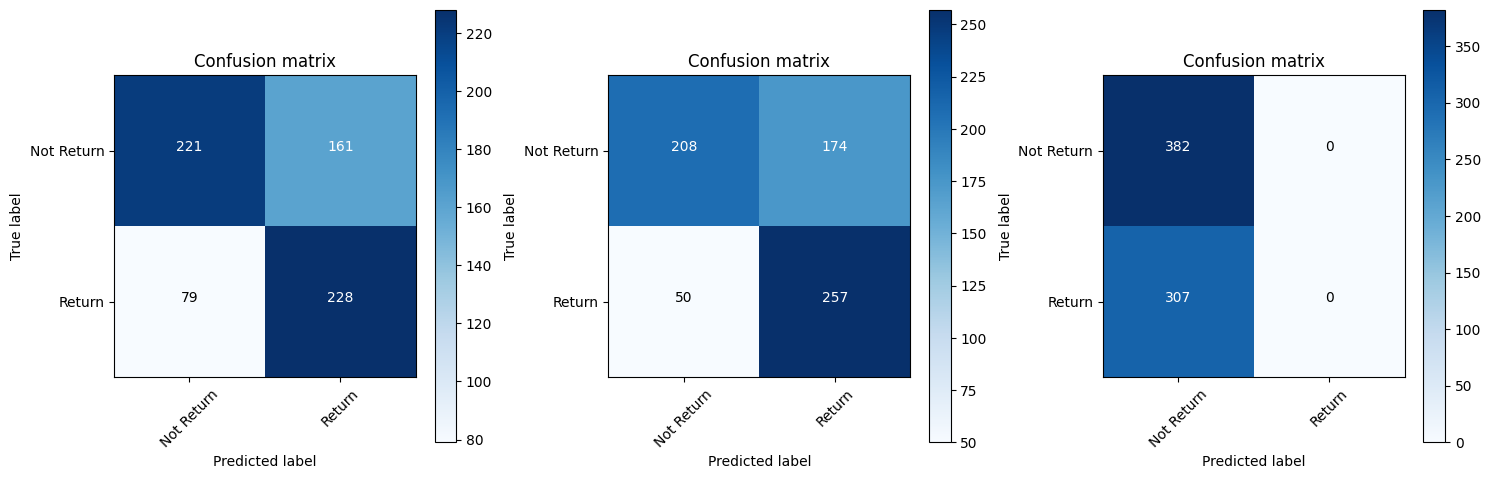

In [27]:
def plot_cm_with_threshold(probs, target, threshold):
    preds = (probs >= threshold).astype(int)
    cm = confusion_matrix(target, preds)
    plot_confusion_matrix(cm, classes=['Not Return', 'Return'])

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plot_cm_with_threshold(df['pred1_probs'], df['target'], threshold1)

plt.subplot(1, 3, 2)
plot_cm_with_threshold(df['pred2_probs'], df['target'], threshold2)

plt.subplot(1, 3, 3)
plot_cm_with_threshold(df['pred3_probs'], df['target'], threshold3)
plt.show()

**Выводы:** здесь напишите, какая модель лучше всего справилась с поставленной задачей.

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги).
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

In [28]:
from sklearn.metrics import recall_score, f1_score

# Вызов функции для первого алгоритма
threshold1_prec, recall1 = find_threshold_for_recall(df['pred1_probs'], df['target'])

# Вызов функции для второго алгоритма
threshold2_prec, recall2 = find_threshold_for_recall(df['pred2_probs'], df['target'])

# Вызов функции для третьего алгоритма
threshold3_prec, recall3 = find_threshold_for_recall(df['pred3_probs'], df['target'])

# Присвоение значений порогов и точностей столбцам DataFrame
df['threshold_optimized_pred_1'] = (df['pred1_probs'] >= threshold1_prec).astype(int)
df['threshold_optimized_pred_2'] = (df['pred2_probs'] >= threshold2_prec).astype(int)
df['threshold_optimized_pred_3'] = (df['pred3_probs'] >= threshold3_prec).astype(int)

# Вывод результатов
print(f"Best threshold and recall for algorithm 1: {threshold1_prec}, {recall1}")
print(f"Best threshold and recall for algorithm 2: {threshold2_prec}, {recall2}")
print(f"Best threshold and recall for algorithm 3: {threshold3_prec}, {recall3}")

Best threshold and recall for algorithm 1: 0.0, 1.0
Best threshold and recall for algorithm 2: 0.0, 1.0
Best threshold and recall for algorithm 3: 0.0, 1.0


**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

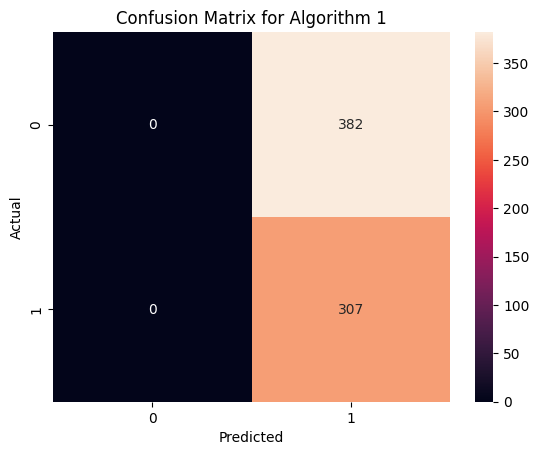

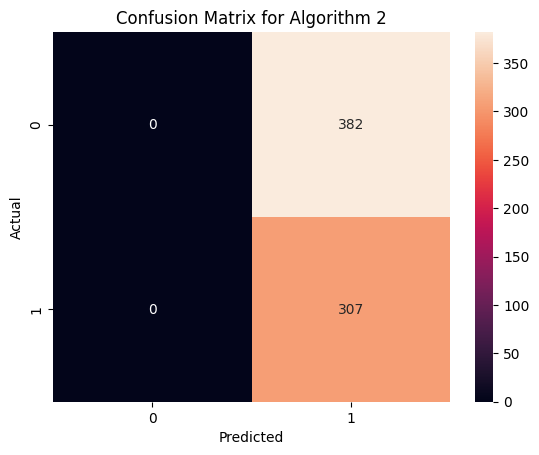

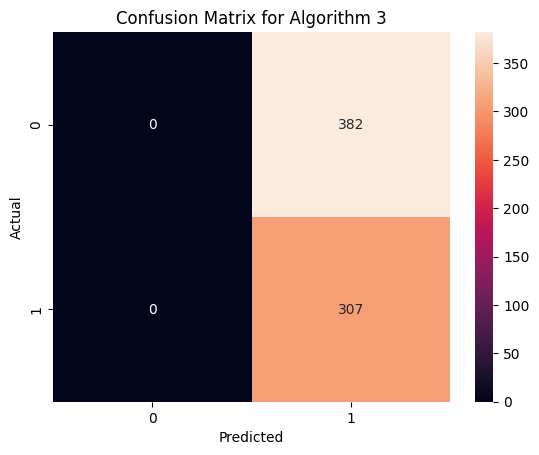

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагаем, что df['threshold_optimized_pred_i'] - это предсказания с оптимальным порогом для i-ой модели
# Нарисуем матрицы ошибок для каждой модели
for i in range(1, 4):
    cm = confusion_matrix(df['target'], df[f'threshold_optimized_pred_{i}'])
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for Algorithm {i}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

Best threshold for algorithm 1: 0.3434343434343435, F1-score: 0.6711590296495958


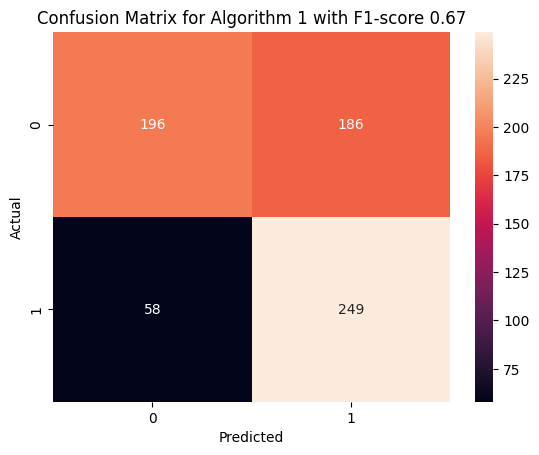

Best threshold for algorithm 2: 0.32323232323232326, F1-score: 0.6990291262135923


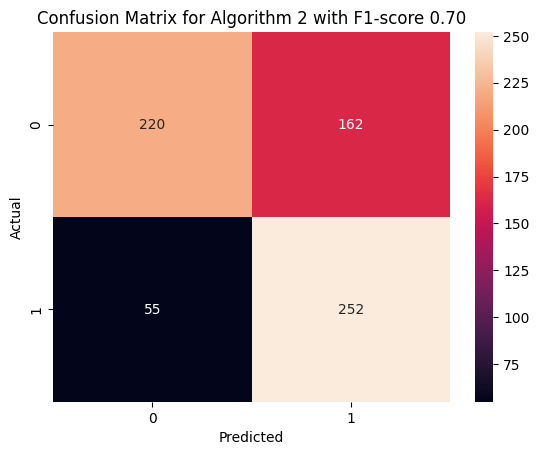

Best threshold for algorithm 3: 0.16161616161616163, F1-score: 0.6401985111662531


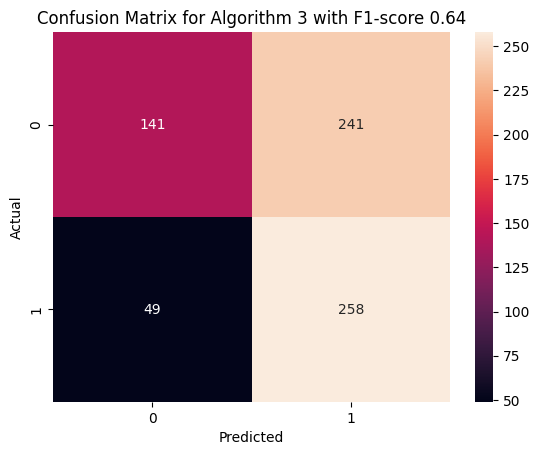

In [30]:
from sklearn.metrics import f1_score

# Найдем порог для максимального F1-score для каждой модели
for i in range(1, 4):
    thresholds = np.linspace(0, 1, 100)
    f1_scores = []
    for threshold in thresholds:
        preds = df[f'pred{i}_probs'] > threshold
        f1_scores.append(f1_score(df['target'], preds))

    max_f1_index = np.argmax(f1_scores)
    best_threshold = thresholds[max_f1_index]
    best_f1 = f1_scores[max_f1_index]

    print(f'Best threshold for algorithm {i}: {best_threshold}, F1-score: {best_f1}')

    # Матрица ошибок при этом пороге
    best_preds = df[f'pred{i}_probs'] > best_threshold
    cm = confusion_matrix(df['target'], best_preds)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for Algorithm {i} with F1-score {best_f1:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [31]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Отнормируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучим логистическую регрессию
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

LogisticRegression()

**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность
    б) полноту
    в) f1-score.
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

In [39]:
best_recall = 0  # Начальное значение для лучшей полноты
best_threshold_f1 = 0  # Начальное значение для лучшего порога F1-score
probabilities = log_reg.predict_proba(X_scaled)[:, 1]

# Найдем порог для максимизации точности, полноты и F1-score
thresholds = np.linspace(0, 1, num=100)

for threshold in thresholds:
    predicted_classes = (probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y, predicted_classes).ravel()

    # Вычисляем точность и полноту
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    f1 = f1_score(y, predicted_classes)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold_accuracy = threshold

    if recall > best_recall:
        best_recall = recall
        best_threshold_recall = threshold

    if f1 > best_f1:
        best_f1 = f1
        best_threshold_f1 = threshold

# Выведем лучшие пороги и соответствующие метрики
print(f"Лучший порог для точности: {best_threshold_accuracy} с точностью {best_accuracy}")
print(f"Лучший порог для полноты: {best_threshold_recall} с полнотой {best_recall}")
print(f"Лучший порог для F1-score: {best_threshold_f1} с F1-score {best_f1}")


Лучший порог для точности: 0.4444444444444445 с точностью 0.8691869186918691
Лучший порог для полноты: 0.0 с полнотой 1.0
Лучший порог для F1-score: 0 с F1-score 0.6401985111662531
